# STDSR Homework 2: Bayesian Inference

Daniil Burakov

## Task 1

Assuming independence of samples, the distribution is binomial:

$$X \sim Bin(n, \theta)$$

## Task 2

Let $\theta \sim Beta(\alpha, \beta)$. Beta distribution has the following properties:

$$
\alpha > 0 \\
\beta > 0 \\
E(\theta) = \frac{\alpha}{\alpha + \beta} \\
Var(\theta) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}
$$

Given that $E(\theta) = 0.2$ and $Var(\theta) = 0.16^2$ we can solve for $\alpha$ and $\beta$:

$$
4 \alpha = \beta \\
\alpha = 1.05 ≈ 1\\
\beta = 4.2 ≈ 4
$$

## Task 3

We have observed $x = 17$ out of $n = 116$ samples contain 

According to Bayes' theorem:

$$
P(\theta | x=17)  \propto P(x=17 | \theta)P(\theta)
$$

According to the problem definition, the prior distribution of $\theta$ follows Beta distribution:

$$
P(\theta) \sim Beta(\alpha=1, \beta=4) = \frac{\theta^{1 - 1} (1 - \theta)^{4- 1}}{B(1, 4)}
$$

The likelihood definition is taken from the first task:

$$
P(x = 17 | \theta) \sim Bin(n, \theta) = C_{116}^{17} \theta^{17} (1 - \theta)^{99}
$$

Now we can combine the likelihood and the prior:

$$
P(x=17 | \theta)P(\theta) = C_{116}^{17} \theta^{17} (1 - \theta)^{99} \frac{\theta^{1 - 1} (1-\theta)^{4 - 1}}{B(1, 4)} = \frac{C_{116}^{17}}{B(1, 4)} \theta^{18 - 1} (1-\theta)^{103 - 1}
$$

If we define the normalizer as $\frac{1}{B(18, 103)}\frac{B(1, 4)}{C_{116}^{17}}$, then the posterior can be defined as:

$$
P(\theta | x = 17) = \frac{\theta^{18 - 1} (1-\theta)^{103 - 1}}{B(18, 103)} = Beta(18, 103)
$$

Since the posterior follows the Beta distribution, the expected value and variance are calculated similar to the Task 2:

$$
E(P(\theta | x = 17)) = 0.148760331\\
\sqrt{Var(P(\theta | x = 17))} = 0.03221734 
$$

The normalized likelihood, consequently, is:

$$
\frac{P(x=17 | \theta)}{P(x=17)} = \frac{1}{B(18, 103)}\frac{B(1, 4)}{C_{116}^{17}} C_{116}^{17} \theta^{17} (1 - \theta)^{99} = \frac{B(1, 4)}{B(18, 103)} \theta^{17} (1 - \theta)^{99}
$$







## Task 4

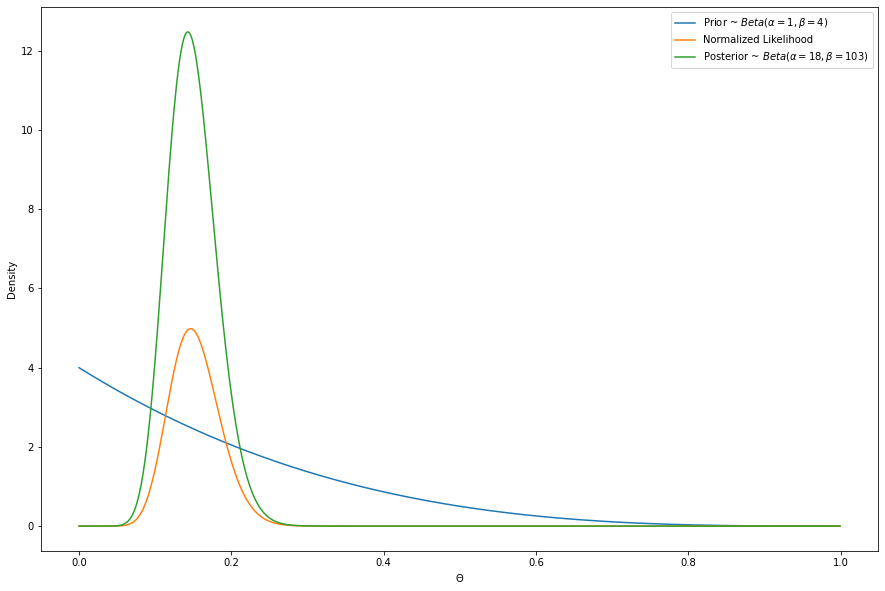

In [ ]:
import numpy as np
from scipy.stats import beta
from scipy.special import gamma
import matplotlib.pyplot as plt


def B(a: int, b: int) -> int:
  return gamma(a) * gamma(b) / gamma(a + b)

a_prior = 1
b_prior = 4

a_posterior = 18
b_posterior = 103

thetas = np.arange(0, 1, 0.001)
prior = beta.pdf(thetas, a_prior, b_prior)
norm_likelihood = B(1, 4) / B(18, 103) * thetas**17 * (1 - thetas)**99
posterior = beta.pdf(thetas, a_posterior, b_posterior)

plt.figure(figsize=(15, 10))
plt.plot(thetas, prior, label=r'Prior ~ $Beta(\alpha=1, \beta=4)$')
plt.plot(thetas, norm_likelihood, label='Normalized Likelihood')
plt.plot(thetas, posterior, label=r'Posterior ~ $Beta(\alpha=18, \beta=103)$')
plt.legend()
plt.xlabel(r"$\Theta$")
plt.ylabel("Density")
plt.show()

## Task 5

We use CDF of $Beta(18, 103)$ at 0.1 to find the $P(\theta < 0.1)$:

In [ ]:
from scipy.stats import beta

probability = beta.cdf(0.1, 18, 103)

print(f"P(theta < 0.1) = {probability:.3f}")

P(theta < 0.1) = 0.053


## Task 6

In [ ]:
from scipy.stats import beta

confidence = 0.95
alpha = 1 - confidence

lower_bound = beta.ppf(alpha / 2 , 18, 103)
upper_bound = beta.ppf(confidence + alpha / 2 , 18, 103)

print(f"Interval for theta with {int(confidence * 100)}% confidence is [{lower_bound:.3f}; {upper_bound:.3f}]")

Interval for theta with 95% confidence is [0.091; 0.217]


# Task 7

For arbitrary $n$ and $x$ the posterior will look as follows:

$$
P(\theta | x) = K * C_{n}^{x} \theta^{x} (1 - \theta)^{n-x} \frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)} = \frac{K * C_{n}^{x}}{B(\alpha, \beta)} \theta^{(\alpha + x) - 1} (1 - \theta)^{(\beta + n - x) - 1}
$$

where $K$ - is an unknown constant that should normalize the posterior distribution so that it integrates to one

Similar to the third task, we can find $K$ such that the posterior follows $Beta(\alpha + x, \beta + n - x)$ distribution:

$$
K = \frac{B(\alpha, \beta)}{C_n^x} \frac{1}{B(\alpha + x, \beta + n - x)}
$$

Now, having defined $P(\theta | x) = Beta(\alpha + x, \beta + n - x)$, we can marginalize $\theta$ to find the posterior predictive probability for a new observation with $\hat x$ and $\hat n$:

$$
P(\hat x | x) = \int_{0}^{1}{p(\hat x | \theta) p(\theta | x) d\theta} = \int_{0}^{1} C_{\hat n}^{\hat x} \theta^{\hat x} (1- \theta)^{\hat n - \hat x} \frac{\theta^{(\alpha + x) - 1} (1 - \theta)^{(\beta + n - x) - 1}}{B(\alpha + x, \beta + n - x)} d\theta = \\
= \frac{C_{\hat n}^{\hat x}}{B(\alpha + x, \beta + n - x)} \int_{0}^{1}{\theta^{(\alpha + x + \hat x) - 1} (1 - \theta)^{(\beta + n - x + \hat n - \hat x) - 1}} d\theta
$$

The part under the integral is unnormalized $Beta(\alpha + x + \hat x, \beta + n - x + \hat n - \hat x)$, so it will integrate to $B(\alpha + x + \hat x, \beta + n - x + \hat n - \hat x)$:

$$
P(\hat x | x) = \frac{C_{\hat n}^{\hat x} B(\alpha + x + \hat x, \beta + n - x + \hat n - \hat x)}{B(\alpha + x, \beta + n - x)}
$$

For $\hat n = 50$ and $\hat x = 5$, the probability of this observation is:


In [ ]:
from scipy.stats import beta
from scipy.special import gamma, comb


def B(a: int, b: int) -> int:
  return gamma(a) * gamma(b) / gamma(a + b)

def predict(x_hat, n_hat, x, n, a, b):
  return comb(n_hat, x_hat) * B(a + x + x_hat, b + n - x + n_hat - x_hat) / B(a + x, b + n - x)

x = 17
n = 116

x_hat = 5
n_hat = 50

a = 1
b = 4

print(f"P(x_hat = {x_hat} | x) = {predict(x_hat, n_hat, x, n, a, b):.3f}")

P(x_hat = 5 | x) = 0.111


## Task 8

From the first task, observations follow the binomial distribution $Bin(n, \theta)$

Let significance level $\alpha = 0.05$

Hypotheses:

$$
H_0: \theta \geq 0.2 \\
H_1:  \theta < 0.2
$$

We have observed $n = 116$, $x = 17$ 

Assuming $H_0$ is true, we can find the probability of observing 17 or less samples with Giardia cysts out of 116 samples is:

$$
p = P(x \leq 17 | n = 116, \theta = 0.2) = 0.0894761941 > \alpha = 0.05
$$

For other thetas, greater than 0.2, the probability will be smaller, but we  still cannot reject $H_0$ since at least for $\theta = 0.2$ the p-value is larger than $\alpha$

## Task 9

From the first task, observations follow the binomial distribution $Bin(n, \theta)$

Let significance level $\alpha = 0.05$

Hypotheses:

$$
H_0: \theta \geq 0.2 \\
H_1:  \theta < 0.2
$$

We have observed $n = 116$, $x = 17$


Assuming $H_0$ is true, we can check $P(\theta \geq 0.2)$ as in the task 5:

In [ ]:
from scipy.stats import beta

probability = 1 - beta.cdf(0.2, 18, 103)

print(f"P(theta >= 0.2) = {probability:.3f}")

P(theta >= 0.2) = 0.065


since the obtained p-value is greater than $\alpha$, we cannot reject $H_0$